# Working with smile compounds using rdkit

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np 
import pandas as pd
from rdkit import Chem 
import matplotlib.pyplot as plt


In [3]:
train_data = pd.read_csv("train.csv")

In [4]:
train_data

,Id,Expected
0,C1=CC(=CC=C1C(C2=CC=C(C=C2)O)C(Cl)(Cl)Cl)O;1644,2
1,CCCCCCCCC(=O)C;2451,2
2,CCCCCCCCCC[N+](C)(C)CCCCCCCCCC.[Cl-];1384,2
3,C1CN(C(=N1)N[N+](=O)[O-])CC2=CN=C(C=C2)Cl;16,2
4,[Na+].[I-];1856,2
...,...,...
75378,COC(=O)NS(=O)(=O)C1=CC=C(C=C1)N;33,2
75379,CCOP(=S)(OCC)OC1=NN(C(=N1)Cl)C(C)C;1632,1
75380,C1=CC=C2C(=C1)NC(=S)S2;1373,1
75381,CCCCC(CC)C=O;2,2


In [5]:
# Extract assay Id and chemical from Id
def extract_assay_Id_and_chemical(data):
    chemical_compound = []
    assay_ids = []
    for columns in data["Id"]:
        d = columns.split(";")
        chemical = d[0]
        assay_id = int(d[-1])
        chemical_compound.append(chemical)
        assay_ids.append(assay_id)
    return assay_ids, chemical_compound

In [6]:
assay_ids, chemical_compound = extract_assay_Id_and_chemical(train_data)
train_data["Chemical_Compound"] = chemical_compound
train_data["Assay_Id"] = assay_ids
train_data
train_data = train_data.drop("Id",axis=1)

In [7]:
train_data

,Expected,Chemical_Compound,Assay_Id
0,2,C1=CC(=CC=C1C(C2=CC=C(C=C2)O)C(Cl)(Cl)Cl)O,1644
1,2,CCCCCCCCC(=O)C,2451
2,2,CCCCCCCCCC[N+](C)(C)CCCCCCCCCC.[Cl-],1384
3,2,C1CN(C(=N1)N[N+](=O)[O-])CC2=CN=C(C=C2)Cl,16
4,2,[Na+].[I-],1856
...,...,...,...
75378,2,COC(=O)NS(=O)(=O)C1=CC=C(C=C1)N,33
75379,1,CCOP(=S)(OCC)OC1=NN(C(=N1)Cl)C(C)C,1632
75380,1,C1=CC=C2C(=C1)NC(=S)S2,1373
75381,2,CCCCC(CC)C=O,2


In [8]:
train_data.to_csv("extracted_compounds.csv",index=False)

# Working on extracted compounds

In [9]:
data = pd.read_csv("extracted_compounds.csv")

In [10]:
data

,Expected,Chemical_Compound,Assay_Id
0,2,C1=CC(=CC=C1C(C2=CC=C(C=C2)O)C(Cl)(Cl)Cl)O,1644
1,2,CCCCCCCCC(=O)C,2451
2,2,CCCCCCCCCC[N+](C)(C)CCCCCCCCCC.[Cl-],1384
3,2,C1CN(C(=N1)N[N+](=O)[O-])CC2=CN=C(C=C2)Cl,16
4,2,[Na+].[I-],1856
...,...,...,...
75378,2,COC(=O)NS(=O)(=O)C1=CC=C(C=C1)N,33
75379,1,CCOP(=S)(OCC)OC1=NN(C(=N1)Cl)C(C)C,1632
75380,1,C1=CC=C2C(=C1)NC(=S)S2,1373
75381,2,CCCCC(CC)C=O,2


In [11]:
count_of_assId =  data.Assay_Id.value_counts()

In [12]:
# using RDKit to get molicular descriptions 

In [13]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

In [14]:
"""
Function written by referring the following Github repoetry 
https://github.com/gashawmg/molecular-descriptors
"""
calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
desc_names = calc.GetDescriptorNames()
smile_descriptions = pd.DataFrame(columns=desc_names)

In [15]:
mol = Chem.MolFromSmiles(data["Chemical_Compound"][1])

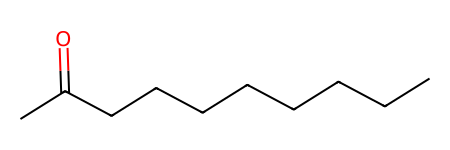

In [16]:
mol

In [17]:
smile = Chem.MolToSmiles(mol)

In [18]:
# Calculate Each molecule description and add to column 
i=0
error_set = []
for SMILE in data["Chemical_Compound"]:
    if(i%10==0):
        print("Calcualting",i)
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    # Converting molicule to molicular form
    mols = Chem.MolFromSmiles(SMILE)
    # Comverting molecule to canocial form
    description = list(calc.CalcDescriptors(mols))
    smile_descriptions.loc[i] = description
    i = i+1

Calcualting 0
Calcualting 10
Calcualting 20
Calcualting 30
Calcualting 40
Calcualting 50
Calcualting 60
Calcualting 70
Calcualting 80
Calcualting 90
Calcualting 100
Calcualting 110
Calcualting 120
Calcualting 130
Calcualting 140
Calcualting 150
Calcualting 160
Calcualting 170
Calcualting 180
Calcualting 190
Calcualting 200
Calcualting 210
Calcualting 220
Calcualting 230
Calcualting 240
Calcualting 250
Calcualting 260
Calcualting 270
Calcualting 280
Calcualting 290
Calcualting 300
Calcualting 310
Calcualting 320
Calcualting 330
Calcualting 340
Calcualting 350
Calcualting 360
Calcualting 370
Calcualting 380
Calcualting 390
Calcualting 400
Calcualting 410
Calcualting 420
Calcualting 430
Calcualting 440
Calcualting 450
Calcualting 460
Calcualting 470
Calcualting 480
Calcualting 490
Calcualting 500
Calcualting 510
Calcualting 520
Calcualting 530
Calcualting 540
Calcualting 550
Calcualting 560
Calcualting 570
Calcualting 580
Calcualting 590
Calcualting 600
Calcualting 610
Calcualting 620
Cal

Calcualting 4910
Calcualting 4920
Calcualting 4930
Calcualting 4940
Calcualting 4950
Calcualting 4960
Calcualting 4970
Calcualting 4980
Calcualting 4990
Calcualting 5000
Calcualting 5010
Calcualting 5020
Calcualting 5030
Calcualting 5040
Calcualting 5050
Calcualting 5060
Calcualting 5070
Calcualting 5080
Calcualting 5090
Calcualting 5100
Calcualting 5110
Calcualting 5120
Calcualting 5130
Calcualting 5140
Calcualting 5150
Calcualting 5160
Calcualting 5170
Calcualting 5180
Calcualting 5190
Calcualting 5200
Calcualting 5210
Calcualting 5220
Calcualting 5230
Calcualting 5240
Calcualting 5250
Calcualting 5260
Calcualting 5270
Calcualting 5280
Calcualting 5290
Calcualting 5300
Calcualting 5310
Calcualting 5320
Calcualting 5330
Calcualting 5340
Calcualting 5350
Calcualting 5360
Calcualting 5370
Calcualting 5380
Calcualting 5390
Calcualting 5400
Calcualting 5410
Calcualting 5420
Calcualting 5430
Calcualting 5440
Calcualting 5450
Calcualting 5460
Calcualting 5470
Calcualting 5480
Calcualting 54

Calcualting 9740
Calcualting 9750
Calcualting 9760
Calcualting 9770
Calcualting 9780
Calcualting 9790
Calcualting 9800
Calcualting 9810
Calcualting 9820
Calcualting 9830
Calcualting 9840
Calcualting 9850
Calcualting 9860
Calcualting 9870
Calcualting 9880
Calcualting 9890
Calcualting 9900
Calcualting 9910
Calcualting 9920
Calcualting 9930
Calcualting 9940
Calcualting 9950
Calcualting 9960
Calcualting 9970
Calcualting 9980
Calcualting 9990
Calcualting 10000
Calcualting 10010
Calcualting 10020
Calcualting 10030
Calcualting 10040
Calcualting 10050
Calcualting 10060
Calcualting 10070
Calcualting 10080
Calcualting 10090
Calcualting 10100
Calcualting 10110
Calcualting 10120
Calcualting 10130


[18:52:22] Explicit valence for atom # 1 Si, 8, is greater than permitted
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/EState/EState.py", line 76, in MaxEStateIndex
    return max(EStateIndices(mol, force))
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/EState/EState.py", line 46, in EStateIndices
    nAtoms = mol.GetNumAtoms()
AttributeError: 'NoneType' object has no attribute 'GetNumAtoms'
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/EState/EState.py", line 83, in MinEStateIndex
    return min(EStateIndices(mol, force))
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem

Calcualting 10140
Calcualting 10150
Calcualting 10160
Calcualting 10170
Calcualting 10180
Calcualting 10190
Calcualting 10200
Calcualting 10210
Calcualting 10220
Calcualting 10230
Calcualting 10240
Calcualting 10250
Calcualting 10260
Calcualting 10270
Calcualting 10280
Calcualting 10290
Calcualting 10300
Calcualting 10310
Calcualting 10320
Calcualting 10330
Calcualting 10340
Calcualting 10350
Calcualting 10360
Calcualting 10370
Calcualting 10380
Calcualting 10390
Calcualting 10400
Calcualting 10410
Calcualting 10420
Calcualting 10430
Calcualting 10440
Calcualting 10450
Calcualting 10460
Calcualting 10470
Calcualting 10480
Calcualting 10490
Calcualting 10500
Calcualting 10510
Calcualting 10520
Calcualting 10530
Calcualting 10540
Calcualting 10550
Calcualting 10560
Calcualting 10570
Calcualting 10580
Calcualting 10590
Calcualting 10600
Calcualting 10610
Calcualting 10620
Calcualting 10630
Calcualting 10640
Calcualting 10650
Calcualting 10660
Calcualting 10670
Calcualting 10680
Calcualtin

Calcualting 14720
Calcualting 14730
Calcualting 14740
Calcualting 14750
Calcualting 14760
Calcualting 14770
Calcualting 14780
Calcualting 14790
Calcualting 14800
Calcualting 14810
Calcualting 14820
Calcualting 14830
Calcualting 14840
Calcualting 14850
Calcualting 14860
Calcualting 14870
Calcualting 14880
Calcualting 14890
Calcualting 14900
Calcualting 14910
Calcualting 14920
Calcualting 14930
Calcualting 14940
Calcualting 14950
Calcualting 14960
Calcualting 14970
Calcualting 14980
Calcualting 14990
Calcualting 15000
Calcualting 15010
Calcualting 15020
Calcualting 15030
Calcualting 15040
Calcualting 15050
Calcualting 15060
Calcualting 15070
Calcualting 15080
Calcualting 15090
Calcualting 15100
Calcualting 15110
Calcualting 15120
Calcualting 15130
Calcualting 15140
Calcualting 15150
Calcualting 15160
Calcualting 15170
Calcualting 15180
Calcualting 15190
Calcualting 15200
Calcualting 15210
Calcualting 15220
Calcualting 15230
Calcualting 15240
Calcualting 15250
Calcualting 15260
Calcualtin

Calcualting 19290
Calcualting 19300
Calcualting 19310
Calcualting 19320
Calcualting 19330
Calcualting 19340
Calcualting 19350
Calcualting 19360
Calcualting 19370
Calcualting 19380
Calcualting 19390
Calcualting 19400
Calcualting 19410
Calcualting 19420
Calcualting 19430
Calcualting 19440
Calcualting 19450
Calcualting 19460
Calcualting 19470
Calcualting 19480
Calcualting 19490
Calcualting 19500
Calcualting 19510
Calcualting 19520
Calcualting 19530
Calcualting 19540
Calcualting 19550
Calcualting 19560
Calcualting 19570
Calcualting 19580
Calcualting 19590
Calcualting 19600
Calcualting 19610
Calcualting 19620
Calcualting 19630
Calcualting 19640
Calcualting 19650
Calcualting 19660
Calcualting 19670
Calcualting 19680
Calcualting 19690
Calcualting 19700
Calcualting 19710
Calcualting 19720
Calcualting 19730
Calcualting 19740
Calcualting 19750
Calcualting 19760
Calcualting 19770
Calcualting 19780
Calcualting 19790
Calcualting 19800
Calcualting 19810
Calcualting 19820
Calcualting 19830
Calcualtin

Calcualting 23850
Calcualting 23860
Calcualting 23870
Calcualting 23880
Calcualting 23890
Calcualting 23900
Calcualting 23910
Calcualting 23920
Calcualting 23930
Calcualting 23940
Calcualting 23950
Calcualting 23960
Calcualting 23970
Calcualting 23980
Calcualting 23990
Calcualting 24000
Calcualting 24010
Calcualting 24020
Calcualting 24030
Calcualting 24040
Calcualting 24050
Calcualting 24060
Calcualting 24070
Calcualting 24080
Calcualting 24090
Calcualting 24100
Calcualting 24110
Calcualting 24120
Calcualting 24130
Calcualting 24140
Calcualting 24150
Calcualting 24160
Calcualting 24170
Calcualting 24180
Calcualting 24190
Calcualting 24200
Calcualting 24210
Calcualting 24220
Calcualting 24230
Calcualting 24240
Calcualting 24250
Calcualting 24260
Calcualting 24270
Calcualting 24280
Calcualting 24290
Calcualting 24300
Calcualting 24310
Calcualting 24320
Calcualting 24330
Calcualting 24340
Calcualting 24350
Calcualting 24360
Calcualting 24370
Calcualting 24380
Calcualting 24390
Calcualtin

[18:55:32] Explicit valence for atom # 1 Si, 8, is greater than permitted
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/EState/EState.py", line 76, in MaxEStateIndex
    return max(EStateIndices(mol, force))
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/EState/EState.py", line 46, in EStateIndices
    nAtoms = mol.GetNumAtoms()
AttributeError: 'NoneType' object has no attribute 'GetNumAtoms'
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/EState/EState.py", line 83, in MinEStateIndex
    return min(EStateIndices(mol, force))
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem

Calcualting 26320
Calcualting 26330
Calcualting 26340
Calcualting 26350
Calcualting 26360
Calcualting 26370
Calcualting 26380
Calcualting 26390
Calcualting 26400
Calcualting 26410
Calcualting 26420
Calcualting 26430
Calcualting 26440
Calcualting 26450
Calcualting 26460
Calcualting 26470
Calcualting 26480
Calcualting 26490
Calcualting 26500
Calcualting 26510
Calcualting 26520
Calcualting 26530
Calcualting 26540
Calcualting 26550
Calcualting 26560
Calcualting 26570
Calcualting 26580
Calcualting 26590
Calcualting 26600
Calcualting 26610
Calcualting 26620
Calcualting 26630
Calcualting 26640
Calcualting 26650
Calcualting 26660
Calcualting 26670
Calcualting 26680
Calcualting 26690
Calcualting 26700
Calcualting 26710
Calcualting 26720
Calcualting 26730
Calcualting 26740
Calcualting 26750
Calcualting 26760
Calcualting 26770
Calcualting 26780
Calcualting 26790
Calcualting 26800
Calcualting 26810
Calcualting 26820
Calcualting 26830
Calcualting 26840
Calcualting 26850
Calcualting 26860
Calcualtin

Calcualting 30890
Calcualting 30900
Calcualting 30910
Calcualting 30920
Calcualting 30930
Calcualting 30940
Calcualting 30950
Calcualting 30960
Calcualting 30970
Calcualting 30980
Calcualting 30990
Calcualting 31000
Calcualting 31010
Calcualting 31020
Calcualting 31030
Calcualting 31040
Calcualting 31050
Calcualting 31060
Calcualting 31070
Calcualting 31080
Calcualting 31090
Calcualting 31100
Calcualting 31110
Calcualting 31120
Calcualting 31130
Calcualting 31140
Calcualting 31150
Calcualting 31160
Calcualting 31170
Calcualting 31180
Calcualting 31190
Calcualting 31200
Calcualting 31210
Calcualting 31220
Calcualting 31230
Calcualting 31240
Calcualting 31250
Calcualting 31260
Calcualting 31270
Calcualting 31280
Calcualting 31290
Calcualting 31300
Calcualting 31310
Calcualting 31320
Calcualting 31330
Calcualting 31340
Calcualting 31350
Calcualting 31360
Calcualting 31370
Calcualting 31380
Calcualting 31390
Calcualting 31400
Calcualting 31410
Calcualting 31420
Calcualting 31430
Calcualtin

Calcualting 35450
Calcualting 35460
Calcualting 35470
Calcualting 35480
Calcualting 35490
Calcualting 35500
Calcualting 35510
Calcualting 35520
Calcualting 35530
Calcualting 35540
Calcualting 35550
Calcualting 35560
Calcualting 35570
Calcualting 35580
Calcualting 35590
Calcualting 35600
Calcualting 35610
Calcualting 35620
Calcualting 35630
Calcualting 35640
Calcualting 35650
Calcualting 35660
Calcualting 35670
Calcualting 35680
Calcualting 35690
Calcualting 35700
Calcualting 35710
Calcualting 35720
Calcualting 35730
Calcualting 35740
Calcualting 35750
Calcualting 35760
Calcualting 35770
Calcualting 35780
Calcualting 35790
Calcualting 35800
Calcualting 35810
Calcualting 35820
Calcualting 35830
Calcualting 35840
Calcualting 35850
Calcualting 35860
Calcualting 35870
Calcualting 35880
Calcualting 35890
Calcualting 35900
Calcualting 35910
Calcualting 35920
Calcualting 35930
Calcualting 35940
Calcualting 35950
Calcualting 35960
Calcualting 35970
Calcualting 35980
Calcualting 35990
Calcualtin

Calcualting 40010
Calcualting 40020
Calcualting 40030
Calcualting 40040
Calcualting 40050
Calcualting 40060
Calcualting 40070
Calcualting 40080
Calcualting 40090
Calcualting 40100
Calcualting 40110
Calcualting 40120
Calcualting 40130
Calcualting 40140
Calcualting 40150
Calcualting 40160
Calcualting 40170
Calcualting 40180
Calcualting 40190
Calcualting 40200
Calcualting 40210
Calcualting 40220
Calcualting 40230
Calcualting 40240
Calcualting 40250
Calcualting 40260
Calcualting 40270
Calcualting 40280
Calcualting 40290
Calcualting 40300
Calcualting 40310
Calcualting 40320
Calcualting 40330
Calcualting 40340
Calcualting 40350
Calcualting 40360
Calcualting 40370
Calcualting 40380
Calcualting 40390
Calcualting 40400
Calcualting 40410
Calcualting 40420
Calcualting 40430
Calcualting 40440
Calcualting 40450
Calcualting 40460
Calcualting 40470
Calcualting 40480
Calcualting 40490
Calcualting 40500
Calcualting 40510
Calcualting 40520
Calcualting 40530
Calcualting 40540
Calcualting 40550
Calcualtin

[18:59:19] Explicit valence for atom # 1 Si, 8, is greater than permitted
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/EState/EState.py", line 76, in MaxEStateIndex
    return max(EStateIndices(mol, force))
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/EState/EState.py", line 46, in EStateIndices
    nAtoms = mol.GetNumAtoms()
AttributeError: 'NoneType' object has no attribute 'GetNumAtoms'
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/EState/EState.py", line 83, in MinEStateIndex
    return min(EStateIndices(mol, force))
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem

Calcualting 42340
Calcualting 42350
Calcualting 42360
Calcualting 42370
Calcualting 42380
Calcualting 42390
Calcualting 42400
Calcualting 42410
Calcualting 42420
Calcualting 42430
Calcualting 42440
Calcualting 42450
Calcualting 42460
Calcualting 42470
Calcualting 42480
Calcualting 42490
Calcualting 42500
Calcualting 42510
Calcualting 42520
Calcualting 42530
Calcualting 42540
Calcualting 42550
Calcualting 42560
Calcualting 42570
Calcualting 42580
Calcualting 42590
Calcualting 42600
Calcualting 42610
Calcualting 42620
Calcualting 42630
Calcualting 42640
Calcualting 42650
Calcualting 42660
Calcualting 42670
Calcualting 42680
Calcualting 42690
Calcualting 42700
Calcualting 42710
Calcualting 42720
Calcualting 42730
Calcualting 42740
Calcualting 42750
Calcualting 42760
Calcualting 42770
Calcualting 42780
Calcualting 42790
Calcualting 42800
Calcualting 42810
Calcualting 42820
Calcualting 42830
Calcualting 42840
Calcualting 42850
Calcualting 42860
Calcualting 42870
Calcualting 42880
Calcualtin

Calcualting 46900
Calcualting 46910
Calcualting 46920
Calcualting 46930
Calcualting 46940
Calcualting 46950
Calcualting 46960
Calcualting 46970
Calcualting 46980
Calcualting 46990
Calcualting 47000
Calcualting 47010
Calcualting 47020
Calcualting 47030
Calcualting 47040
Calcualting 47050
Calcualting 47060
Calcualting 47070
Calcualting 47080
Calcualting 47090
Calcualting 47100
Calcualting 47110
Calcualting 47120
Calcualting 47130
Calcualting 47140
Calcualting 47150
Calcualting 47160
Calcualting 47170
Calcualting 47180
Calcualting 47190
Calcualting 47200
Calcualting 47210
Calcualting 47220


[19:00:36] Explicit valence for atom # 1 Si, 8, is greater than permitted
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/EState/EState.py", line 76, in MaxEStateIndex
    return max(EStateIndices(mol, force))
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/EState/EState.py", line 46, in EStateIndices
    nAtoms = mol.GetNumAtoms()
AttributeError: 'NoneType' object has no attribute 'GetNumAtoms'
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/EState/EState.py", line 83, in MinEStateIndex
    return min(EStateIndices(mol, force))
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem

Calcualting 47230
Calcualting 47240
Calcualting 47250
Calcualting 47260
Calcualting 47270
Calcualting 47280
Calcualting 47290
Calcualting 47300
Calcualting 47310
Calcualting 47320
Calcualting 47330
Calcualting 47340
Calcualting 47350
Calcualting 47360
Calcualting 47370
Calcualting 47380
Calcualting 47390
Calcualting 47400
Calcualting 47410
Calcualting 47420
Calcualting 47430
Calcualting 47440
Calcualting 47450
Calcualting 47460
Calcualting 47470
Calcualting 47480
Calcualting 47490
Calcualting 47500
Calcualting 47510
Calcualting 47520
Calcualting 47530
Calcualting 47540
Calcualting 47550
Calcualting 47560
Calcualting 47570
Calcualting 47580
Calcualting 47590
Calcualting 47600
Calcualting 47610
Calcualting 47620
Calcualting 47630
Calcualting 47640
Calcualting 47650
Calcualting 47660
Calcualting 47670
Calcualting 47680
Calcualting 47690
Calcualting 47700
Calcualting 47710
Calcualting 47720
Calcualting 47730
Calcualting 47740
Calcualting 47750
Calcualting 47760
Calcualting 47770
Calcualtin

Calcualting 51800
Calcualting 51810
Calcualting 51820
Calcualting 51830
Calcualting 51840
Calcualting 51850
Calcualting 51860
Calcualting 51870
Calcualting 51880
Calcualting 51890
Calcualting 51900
Calcualting 51910
Calcualting 51920
Calcualting 51930
Calcualting 51940
Calcualting 51950
Calcualting 51960
Calcualting 51970
Calcualting 51980
Calcualting 51990
Calcualting 52000
Calcualting 52010
Calcualting 52020
Calcualting 52030
Calcualting 52040
Calcualting 52050
Calcualting 52060
Calcualting 52070
Calcualting 52080
Calcualting 52090
Calcualting 52100
Calcualting 52110
Calcualting 52120
Calcualting 52130
Calcualting 52140
Calcualting 52150
Calcualting 52160
Calcualting 52170
Calcualting 52180
Calcualting 52190
Calcualting 52200
Calcualting 52210
Calcualting 52220
Calcualting 52230
Calcualting 52240
Calcualting 52250
Calcualting 52260
Calcualting 52270
Calcualting 52280
Calcualting 52290
Calcualting 52300
Calcualting 52310
Calcualting 52320
Calcualting 52330
Calcualting 52340
Calcualtin

Calcualting 56360
Calcualting 56370
Calcualting 56380
Calcualting 56390
Calcualting 56400
Calcualting 56410
Calcualting 56420
Calcualting 56430
Calcualting 56440
Calcualting 56450
Calcualting 56460
Calcualting 56470
Calcualting 56480
Calcualting 56490
Calcualting 56500
Calcualting 56510
Calcualting 56520
Calcualting 56530
Calcualting 56540
Calcualting 56550
Calcualting 56560
Calcualting 56570
Calcualting 56580
Calcualting 56590
Calcualting 56600
Calcualting 56610
Calcualting 56620
Calcualting 56630
Calcualting 56640
Calcualting 56650
Calcualting 56660
Calcualting 56670
Calcualting 56680
Calcualting 56690
Calcualting 56700
Calcualting 56710
Calcualting 56720
Calcualting 56730
Calcualting 56740
Calcualting 56750
Calcualting 56760
Calcualting 56770
Calcualting 56780
Calcualting 56790
Calcualting 56800
Calcualting 56810
Calcualting 56820
Calcualting 56830
Calcualting 56840
Calcualting 56850
Calcualting 56860
Calcualting 56870
Calcualting 56880
Calcualting 56890
Calcualting 56900
Calcualtin

Calcualting 60920
Calcualting 60930
Calcualting 60940
Calcualting 60950
Calcualting 60960
Calcualting 60970
Calcualting 60980
Calcualting 60990
Calcualting 61000
Calcualting 61010
Calcualting 61020
Calcualting 61030
Calcualting 61040
Calcualting 61050
Calcualting 61060
Calcualting 61070
Calcualting 61080
Calcualting 61090
Calcualting 61100
Calcualting 61110
Calcualting 61120
Calcualting 61130
Calcualting 61140
Calcualting 61150
Calcualting 61160
Calcualting 61170
Calcualting 61180
Calcualting 61190
Calcualting 61200
Calcualting 61210
Calcualting 61220
Calcualting 61230
Calcualting 61240
Calcualting 61250
Calcualting 61260
Calcualting 61270
Calcualting 61280
Calcualting 61290
Calcualting 61300
Calcualting 61310
Calcualting 61320
Calcualting 61330
Calcualting 61340
Calcualting 61350
Calcualting 61360
Calcualting 61370
Calcualting 61380
Calcualting 61390
Calcualting 61400
Calcualting 61410
Calcualting 61420
Calcualting 61430
Calcualting 61440
Calcualting 61450
Calcualting 61460
Calcualtin

[19:05:17] Explicit valence for atom # 1 Si, 8, is greater than permitted
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/EState/EState.py", line 76, in MaxEStateIndex
    return max(EStateIndices(mol, force))
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/EState/EState.py", line 46, in EStateIndices
    nAtoms = mol.GetNumAtoms()
AttributeError: 'NoneType' object has no attribute 'GetNumAtoms'
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/EState/EState.py", line 83, in MinEStateIndex
    return min(EStateIndices(mol, force))
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem

Calcualting 62950
Calcualting 62960
Calcualting 62970
Calcualting 62980
Calcualting 62990
Calcualting 63000
Calcualting 63010
Calcualting 63020
Calcualting 63030
Calcualting 63040
Calcualting 63050
Calcualting 63060
Calcualting 63070
Calcualting 63080
Calcualting 63090
Calcualting 63100
Calcualting 63110
Calcualting 63120
Calcualting 63130
Calcualting 63140
Calcualting 63150
Calcualting 63160
Calcualting 63170
Calcualting 63180
Calcualting 63190
Calcualting 63200
Calcualting 63210
Calcualting 63220
Calcualting 63230
Calcualting 63240
Calcualting 63250
Calcualting 63260
Calcualting 63270
Calcualting 63280
Calcualting 63290
Calcualting 63300
Calcualting 63310
Calcualting 63320
Calcualting 63330
Calcualting 63340
Calcualting 63350
Calcualting 63360
Calcualting 63370
Calcualting 63380
Calcualting 63390
Calcualting 63400
Calcualting 63410
Calcualting 63420
Calcualting 63430
Calcualting 63440
Calcualting 63450
Calcualting 63460
Calcualting 63470
Calcualting 63480
Calcualting 63490
Calcualtin

Calcualting 67510
Calcualting 67520
Calcualting 67530
Calcualting 67540
Calcualting 67550
Calcualting 67560
Calcualting 67570
Calcualting 67580
Calcualting 67590
Calcualting 67600
Calcualting 67610
Calcualting 67620
Calcualting 67630
Calcualting 67640
Calcualting 67650
Calcualting 67660
Calcualting 67670
Calcualting 67680
Calcualting 67690
Calcualting 67700
Calcualting 67710
Calcualting 67720
Calcualting 67730
Calcualting 67740
Calcualting 67750
Calcualting 67760
Calcualting 67770
Calcualting 67780
Calcualting 67790
Calcualting 67800
Calcualting 67810
Calcualting 67820
Calcualting 67830
Calcualting 67840
Calcualting 67850
Calcualting 67860
Calcualting 67870
Calcualting 67880
Calcualting 67890
Calcualting 67900
Calcualting 67910
Calcualting 67920
Calcualting 67930
Calcualting 67940
Calcualting 67950
Calcualting 67960
Calcualting 67970
Calcualting 67980
Calcualting 67990
Calcualting 68000
Calcualting 68010
Calcualting 68020
Calcualting 68030
Calcualting 68040
Calcualting 68050
Calcualtin

[19:08:06] Explicit valence for atom # 1 Si, 8, is greater than permitted
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/EState/EState.py", line 76, in MaxEStateIndex
    return max(EStateIndices(mol, force))
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/EState/EState.py", line 46, in EStateIndices
    nAtoms = mol.GetNumAtoms()
AttributeError: 'NoneType' object has no attribute 'GetNumAtoms'
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/EState/EState.py", line 83, in MinEStateIndex
    return min(EStateIndices(mol, force))
  File "/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem

Calcualting 72010
Calcualting 72020
Calcualting 72030
Calcualting 72040
Calcualting 72050
Calcualting 72060
Calcualting 72070
Calcualting 72080
Calcualting 72090
Calcualting 72100
Calcualting 72110
Calcualting 72120
Calcualting 72130
Calcualting 72140
Calcualting 72150
Calcualting 72160
Calcualting 72170
Calcualting 72180
Calcualting 72190
Calcualting 72200
Calcualting 72210
Calcualting 72220
Calcualting 72230
Calcualting 72240
Calcualting 72250
Calcualting 72260
Calcualting 72270
Calcualting 72280
Calcualting 72290
Calcualting 72300
Calcualting 72310
Calcualting 72320
Calcualting 72330
Calcualting 72340
Calcualting 72350
Calcualting 72360
Calcualting 72370
Calcualting 72380
Calcualting 72390
Calcualting 72400
Calcualting 72410
Calcualting 72420
Calcualting 72430
Calcualting 72440
Calcualting 72450
Calcualting 72460
Calcualting 72470
Calcualting 72480
Calcualting 72490
Calcualting 72500
Calcualting 72510
Calcualting 72520
Calcualting 72530
Calcualting 72540
Calcualting 72550
Calcualtin

In [20]:
# Saving data for further detail
smile_descriptions["label"] = train_data["Expected"]
smile_descriptions["Assay_id"] = data.Assay_Id
smile_descriptions.to_csv("smile_description_train.csv",index=False)

In [21]:
data["Chemical_Compound"][10140:10150]

10140                                           CCCOCC(C)O
10141                                   C1CC2C(O2)CC1C3CO3
10142                   CCOP(=S)(OCC)OC1=NN(C(=N1)Cl)C(C)C
10143    CC[C@H](C)[C@@H]1[C@H](C=C[C@@]2(O1)C[C@@H]3C[...
10144          C/C(=N\OC(=O)N(SN(C(=O)O/N=C(/SC)\C)C)C)/SC
10145                            C(C(CO)(CO)[N+](=O)[O-])O
10146                   CCOP(=S)(OCC)OC1=NN(C(=N1)Cl)C(C)C
10147    CC(C)N1CCC(CC1)NC(=O)C2=CC3=CC(=NC=C3N2CC(=O)N...
10148    C1[C@@H]2C=C[C@H]1[C@H]3[C@@H]2[C@]4(C(=C([C@@...
10149                      C/C(=C\C(=O)N(C)C)/OP(=O)(OC)OC
Name: Chemical_Compound, dtype: object

In [38]:
test_data = pd.read_csv("test.csv")

In [39]:
test_data

,x
0,CC1=CC(=C(C=C1)C(C)(C)C)O;1682
1,CCS(=O)(=O)C1=C(N=CC=C1)S(=O)(=O)NC(=O)NC2=NC(...
2,CC1=NC2=CC=CC=C2N1C3CC4CCC(C3)N4CCC5(CCN(CC5)C...
3,CC1=CC(=O)[N-]S(=O)(=O)O1.[K+];1850
4,CCC(C)(C)C(=O)O[C@H]1C[C@H](C=C2[C@H]1[C@H]([C...
...,...
10989,CC(=NOCC1=CC=CC=C1C(=NOC)C(=O)OC)C2=CC(=CC=C2)...
10990,C1=CC=C(C(=C1)C(C2=CC=C(C=C2)O)C3=CC=C(C=C3)O)...
10991,CC1=NC(=NC(=N1)OC)NC(=O)NS(=O)(=O)C2=CC=CC=C2C...
10992,COP(=O)(OC)OC=C(Cl)Cl;28


In [40]:
def extract_assay_Id_and_chemical_for_test(data):
    chemical_compound = []
    assay_ids = []
    for columns in data.x:
        d = columns.split(";")
        chemical = d[0]
        assay_id = int(d[-1])
        chemical_compound.append(chemical)
        assay_ids.append(assay_id)
    return assay_ids, chemical_compound

In [41]:
assay_ids, chemical_compound = extract_assay_Id_and_chemical_for_test(test_data)

In [46]:
test_data["Assay_id"] = assay_ids
test_data["Chemical_Compound"] = chemical_compound
test_data = test_data.drop("x",axis=1)

In [47]:
test_data.to_csv("./test_data_new.csv",index=False)

In [48]:
test_data = pd.read_csv("./test_data_new.csv")

In [49]:
test_data

,Assay_id,Chemical_Compound
0,1682,CC1=CC(=C(C=C1)C(C)(C)C)O
1,1656,CCS(=O)(=O)C1=C(N=CC=C1)S(=O)(=O)NC(=O)NC2=NC(...
2,36,CC1=NC2=CC=CC=C2N1C3CC4CCC(C3)N4CCC5(CCN(CC5)C...
3,1850,CC1=CC(=O)[N-]S(=O)(=O)O1.[K+]
4,30,CCC(C)(C)C(=O)O[C@H]1C[C@H](C=C2[C@H]1[C@H]([C...
...,...,...
10989,38,CC(=NOCC1=CC=CC=C1C(=NOC)C(=O)OC)C2=CC(=CC=C2)...
10990,34,C1=CC=C(C(=C1)C(C2=CC=C(C=C2)O)C3=CC=C(C=C3)O)...
10991,1640,CC1=NC(=NC(=N1)OC)NC(=O)NS(=O)(=O)C2=CC=CC=C2C...
10992,28,COP(=O)(OC)OC=C(Cl)Cl


In [50]:
smile_descriptions_test = pd.DataFrame(columns=desc_names)

In [51]:
i=0
error_set = []
for SMILE in test_data["Chemical_Compound"]:
    if(i%10==0):
        print("Calcualting",i)
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    # Converting molicule to molicular form
    mols = Chem.MolFromSmiles(SMILE)
    # Comverting molecule to canocial form
    description = list(calc.CalcDescriptors(mols))
    smile_descriptions_test.loc[i] = description
    i = i+1

Calcualting 0
Calcualting 10
Calcualting 20
Calcualting 30
Calcualting 40
Calcualting 50
Calcualting 60
Calcualting 70
Calcualting 80
Calcualting 90
Calcualting 100
Calcualting 110
Calcualting 120
Calcualting 130
Calcualting 140
Calcualting 150
Calcualting 160
Calcualting 170
Calcualting 180
Calcualting 190
Calcualting 200
Calcualting 210
Calcualting 220
Calcualting 230
Calcualting 240
Calcualting 250
Calcualting 260
Calcualting 270
Calcualting 280
Calcualting 290
Calcualting 300
Calcualting 310
Calcualting 320
Calcualting 330
Calcualting 340
Calcualting 350
Calcualting 360
Calcualting 370
Calcualting 380
Calcualting 390
Calcualting 400
Calcualting 410
Calcualting 420
Calcualting 430
Calcualting 440
Calcualting 450
Calcualting 460
Calcualting 470
Calcualting 480
Calcualting 490
Calcualting 500
Calcualting 510
Calcualting 520
Calcualting 530
Calcualting 540
Calcualting 550
Calcualting 560
Calcualting 570
Calcualting 580
Calcualting 590
Calcualting 600
Calcualting 610
Calcualting 620
Cal

Calcualting 4890
Calcualting 4900
Calcualting 4910
Calcualting 4920
Calcualting 4930
Calcualting 4940
Calcualting 4950
Calcualting 4960
Calcualting 4970
Calcualting 4980
Calcualting 4990
Calcualting 5000
Calcualting 5010
Calcualting 5020
Calcualting 5030
Calcualting 5040
Calcualting 5050
Calcualting 5060
Calcualting 5070
Calcualting 5080
Calcualting 5090
Calcualting 5100
Calcualting 5110
Calcualting 5120
Calcualting 5130
Calcualting 5140
Calcualting 5150
Calcualting 5160
Calcualting 5170
Calcualting 5180
Calcualting 5190
Calcualting 5200
Calcualting 5210
Calcualting 5220
Calcualting 5230
Calcualting 5240
Calcualting 5250
Calcualting 5260
Calcualting 5270
Calcualting 5280
Calcualting 5290
Calcualting 5300
Calcualting 5310
Calcualting 5320
Calcualting 5330
Calcualting 5340
Calcualting 5350
Calcualting 5360
Calcualting 5370
Calcualting 5380
Calcualting 5390
Calcualting 5400
Calcualting 5410
Calcualting 5420
Calcualting 5430
Calcualting 5440
Calcualting 5450
Calcualting 5460
Calcualting 54

Calcualting 9710
Calcualting 9720
Calcualting 9730
Calcualting 9740
Calcualting 9750
Calcualting 9760
Calcualting 9770
Calcualting 9780
Calcualting 9790
Calcualting 9800
Calcualting 9810
Calcualting 9820
Calcualting 9830
Calcualting 9840
Calcualting 9850
Calcualting 9860
Calcualting 9870
Calcualting 9880
Calcualting 9890
Calcualting 9900
Calcualting 9910
Calcualting 9920
Calcualting 9930
Calcualting 9940
Calcualting 9950
Calcualting 9960
Calcualting 9970
Calcualting 9980
Calcualting 9990
Calcualting 10000
Calcualting 10010
Calcualting 10020
Calcualting 10030
Calcualting 10040
Calcualting 10050
Calcualting 10060
Calcualting 10070
Calcualting 10080
Calcualting 10090
Calcualting 10100
Calcualting 10110
Calcualting 10120
Calcualting 10130
Calcualting 10140
Calcualting 10150
Calcualting 10160
Calcualting 10170
Calcualting 10180
Calcualting 10190
Calcualting 10200
Calcualting 10210
Calcualting 10220
Calcualting 10230
Calcualting 10240
Calcualting 10250
Calcualting 10260
Calcualting 10270
Cal

In [54]:
smile_descriptions_test["Assay_id"] = assay_ids

In [55]:
smile_descriptions_test.to_csv("smile_description_test.csv",index=False)